Data Acquisition

In [1]:
import mne
import matplotlib.pyplot as plt
import torch
from torch import nn
import numpy as np

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.signal import detrend, filtfilt, butter, iirnotch, welch
import json
from tqdm import trange

In [3]:
import requests
from pathlib import Path


# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

# Download helper functions from Learn PyTorch repo
if Path("common.py").is_file():
    print("common.py already exists, skipping download...")
else:
    print("Downloading common.py")
    request = requests.get("https://raw.githubusercontent.com/mne-tools/mne-torch/master/common.py")
    with open("common.py", "wb") as f:
        f.write(request.content)

In [3]:
raw = mne.io.read_raw_edf("hand9.edf", preload = True)
raw.ch_names

Extracting EDF parameters from c:\git\Senior_Thesis\hand9.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 107749  =      0.000 ...   430.996 secs...


['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8']

Using matplotlib as 2D backend.


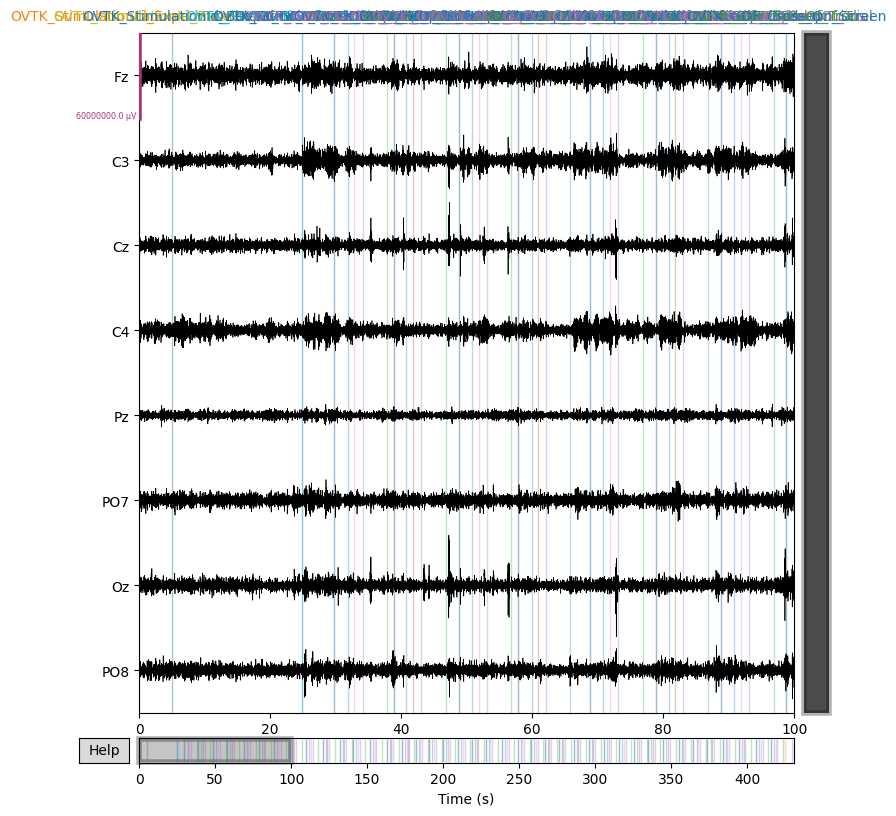

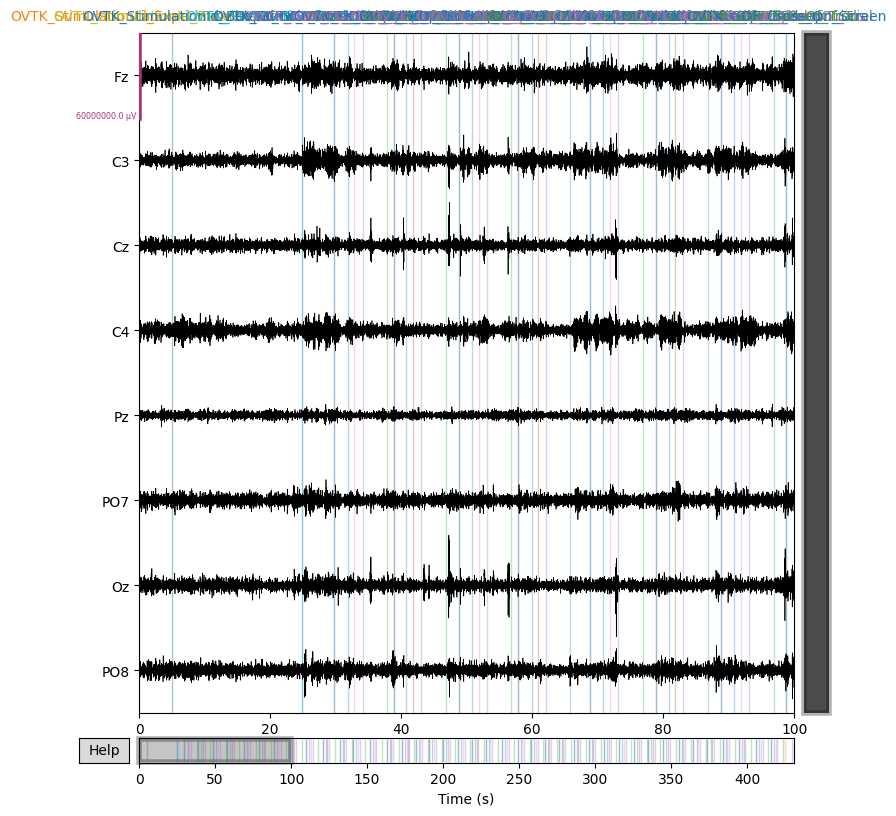

In [4]:
raw.plot(
    duration = 100,
    start = 0,
    scalings = 30
)

In [5]:
raw_eeg = raw.pick_channels(["C3","Cz","C4"])
events, event_dict = mne.events_from_annotations(raw_eeg)
print(event_dict)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_End_Of_Session', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Feedback_Continuous', 'OVTK_GDF_Left', 'OVTK_GDF_Right', 'OVTK_GDF_Start_Of_Trial', 'OVTK_StimulationId_BaselineStart', 'OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Beep', 'OVTK_StimulationId_ExperimentStart', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
{'OVTK_GDF_Cross_On_Screen': 1, 'OVTK_GDF_End_Of_Session': 2, 'OVTK_GDF_End_Of_Trial': 3, 'OVTK_GDF_Feedback_Continuous': 4, 'OVTK_GDF_Left': 5, 'OVTK_GDF_Right': 6, 'OVTK_GDF_Start_Of_Trial': 7, 'OVTK_StimulationId_BaselineStart': 8, 'OVTK_StimulationId_BaselineStop': 9, 'OVTK_StimulationId_Beep': 10, 'OVTK_StimulationId_ExperimentStart': 11, 'OVTK_StimulationId_ExperimentStop': 12, 'OVTK_StimulationId_Train': 13}


In [6]:
selected_event = [event_dict['OVTK_GDF_Left'], event_dict['OVTK_GDF_Right'], event_dict['OVTK_GDF_Start_Of_Trial']] #
# selected_event = [event_dict['OVTK_GDF_Left'], event_dict['OVTK_GDF_Right'], event_dict['OVTK_StimulationId_Train']]
# Cue Lock / Stimulus lock

In [7]:
selected_event
# 5 -> OVTK_GDF_Left
# 6 -> OVTK_GDF_Right
# 7 -> OVTK_GDF_Start_Of_Trial

[5, 6, 7]

In [8]:
# Split Epochs (Trials)

epochs = mne.Epochs(raw_eeg, events,
        tmin=0,     # init timestamp of epoch (0 means trigger timestamp same as event start)
        tmax=5,    # final timestamp (10 means set epoch duration 10 second)
        baseline=(0, 0),
        preload=True,
        event_id = selected_event, #  event_dict
        # event_repeated = 'drop'
    )

epochs = epochs['5','6','7']

Not setting metadata
80 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 80 events and 1251 original time points ...
0 bad epochs dropped


In [9]:
print(epochs)

<Epochs |  80 events (all good), 0 – 5 s, baseline 0 – 0 s, ~2.3 MB, data loaded,
 '5': 20
 '6': 20
 '7': 40>


In [10]:
epochs['5'].plot(
    scalings=50, # You may edit scalings value later
    title='Left',
)

AttributeError: 'NoneType' object has no attribute 'canvas'

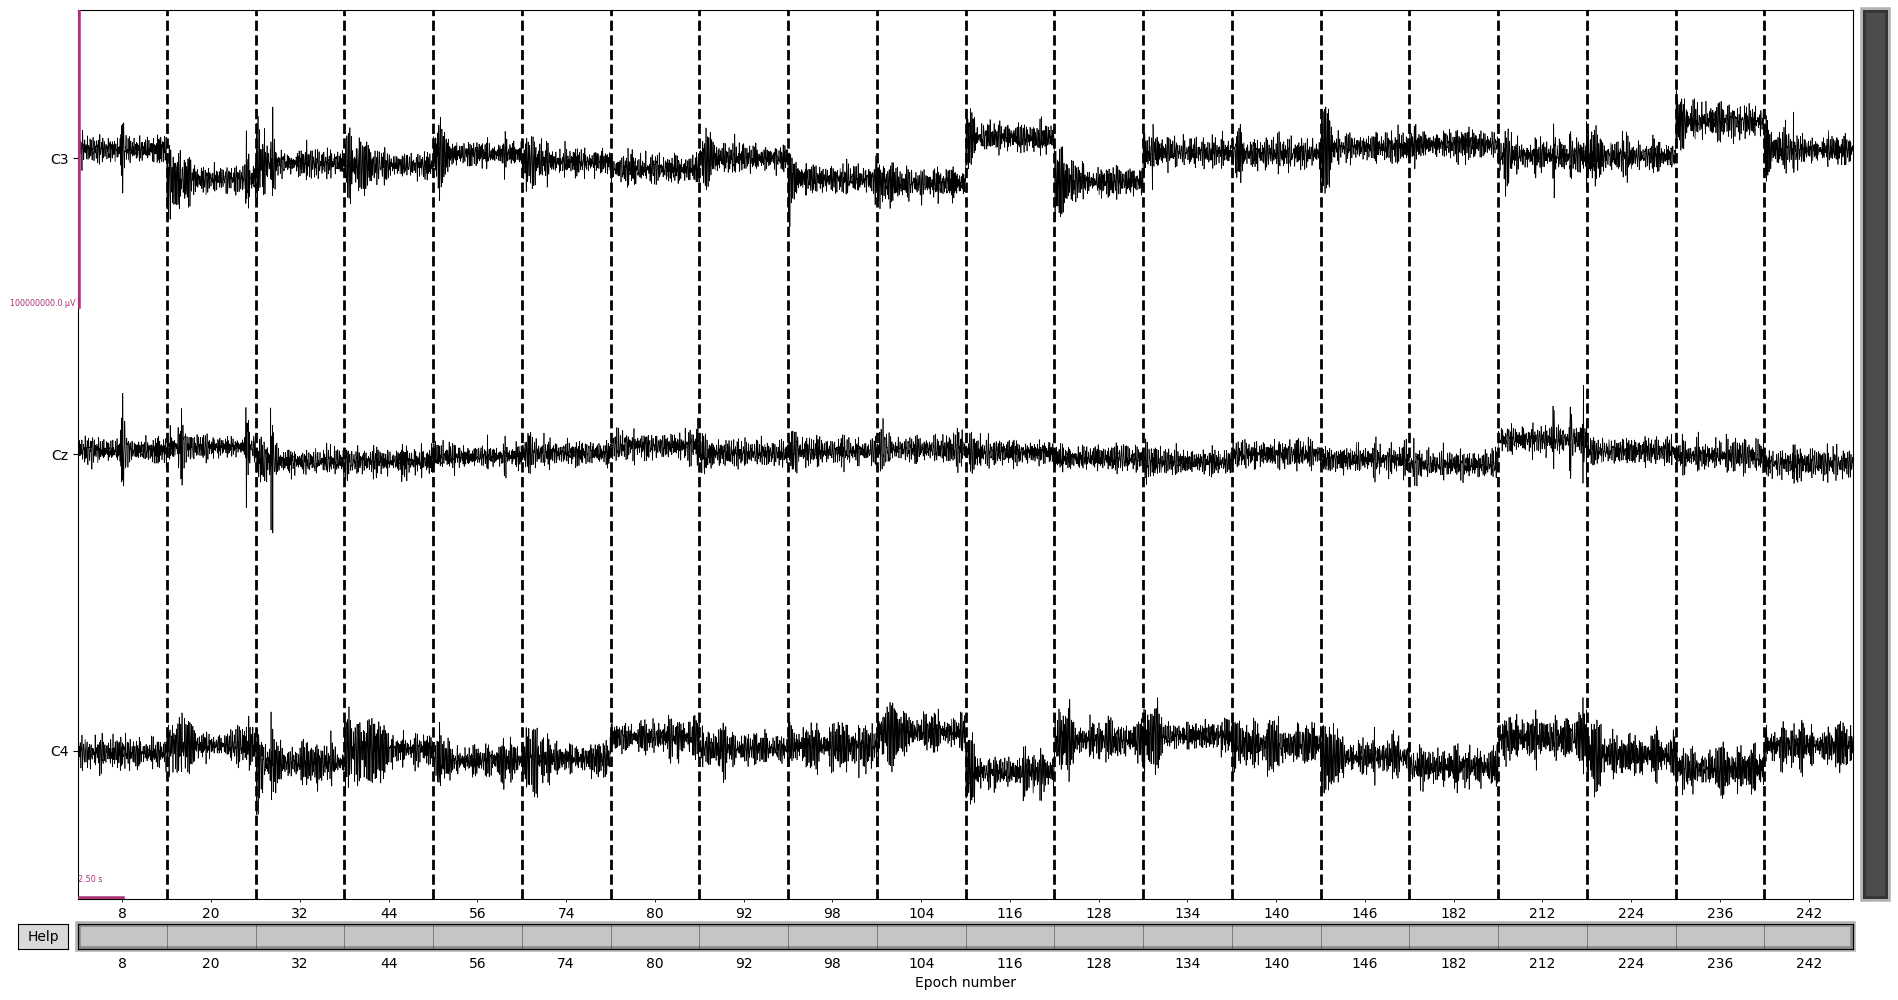

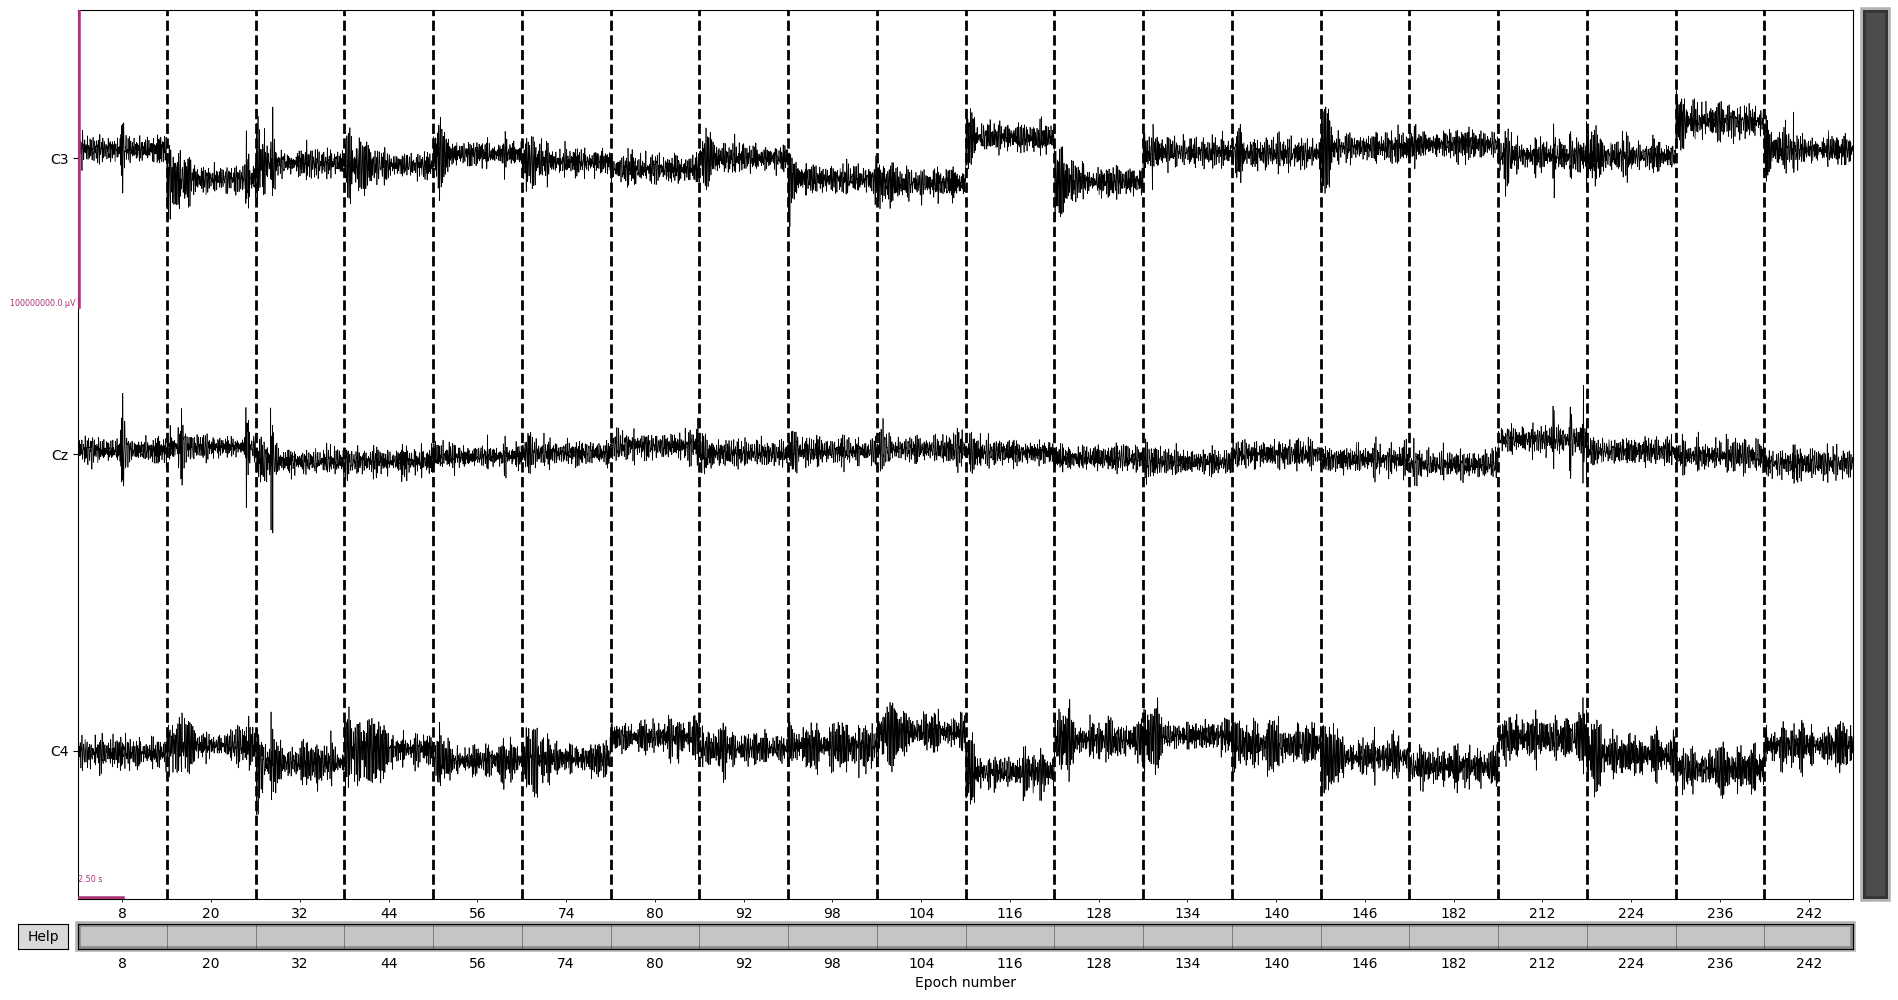

In [25]:
epochs['6'].plot(
    scalings=50, # You may edit scalings value later
    title='Right',
)

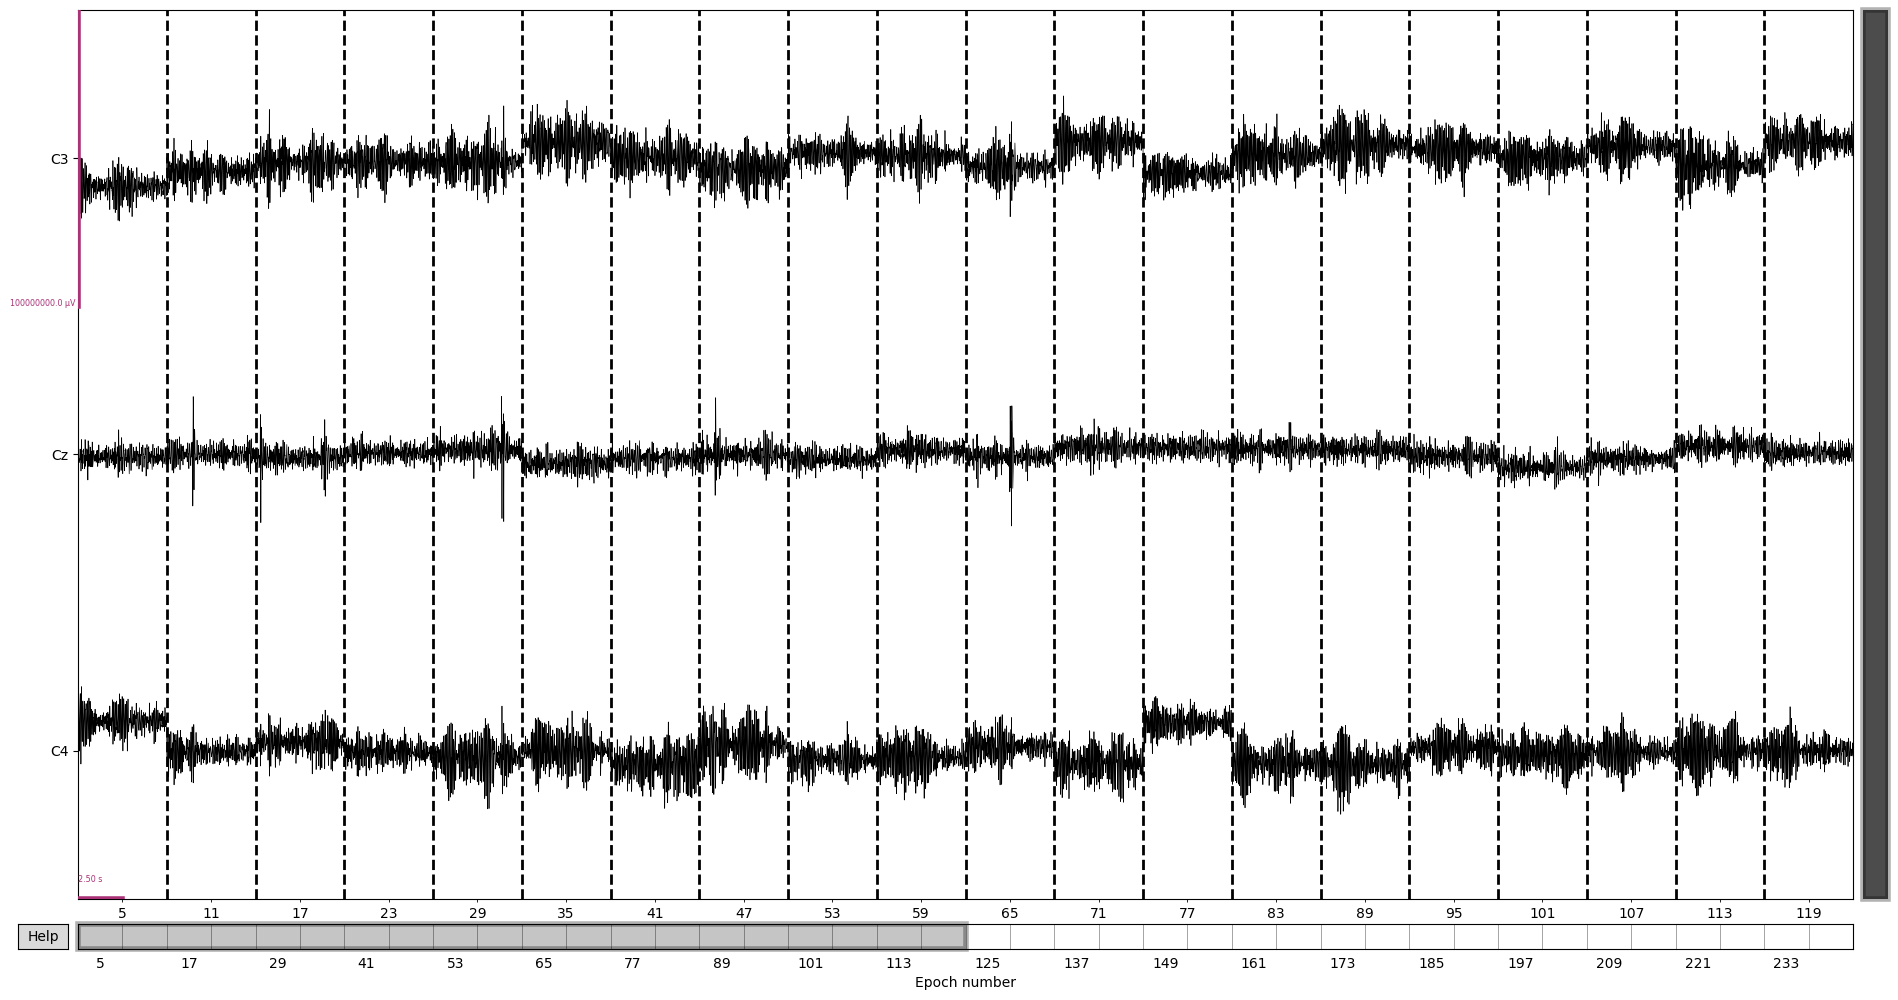

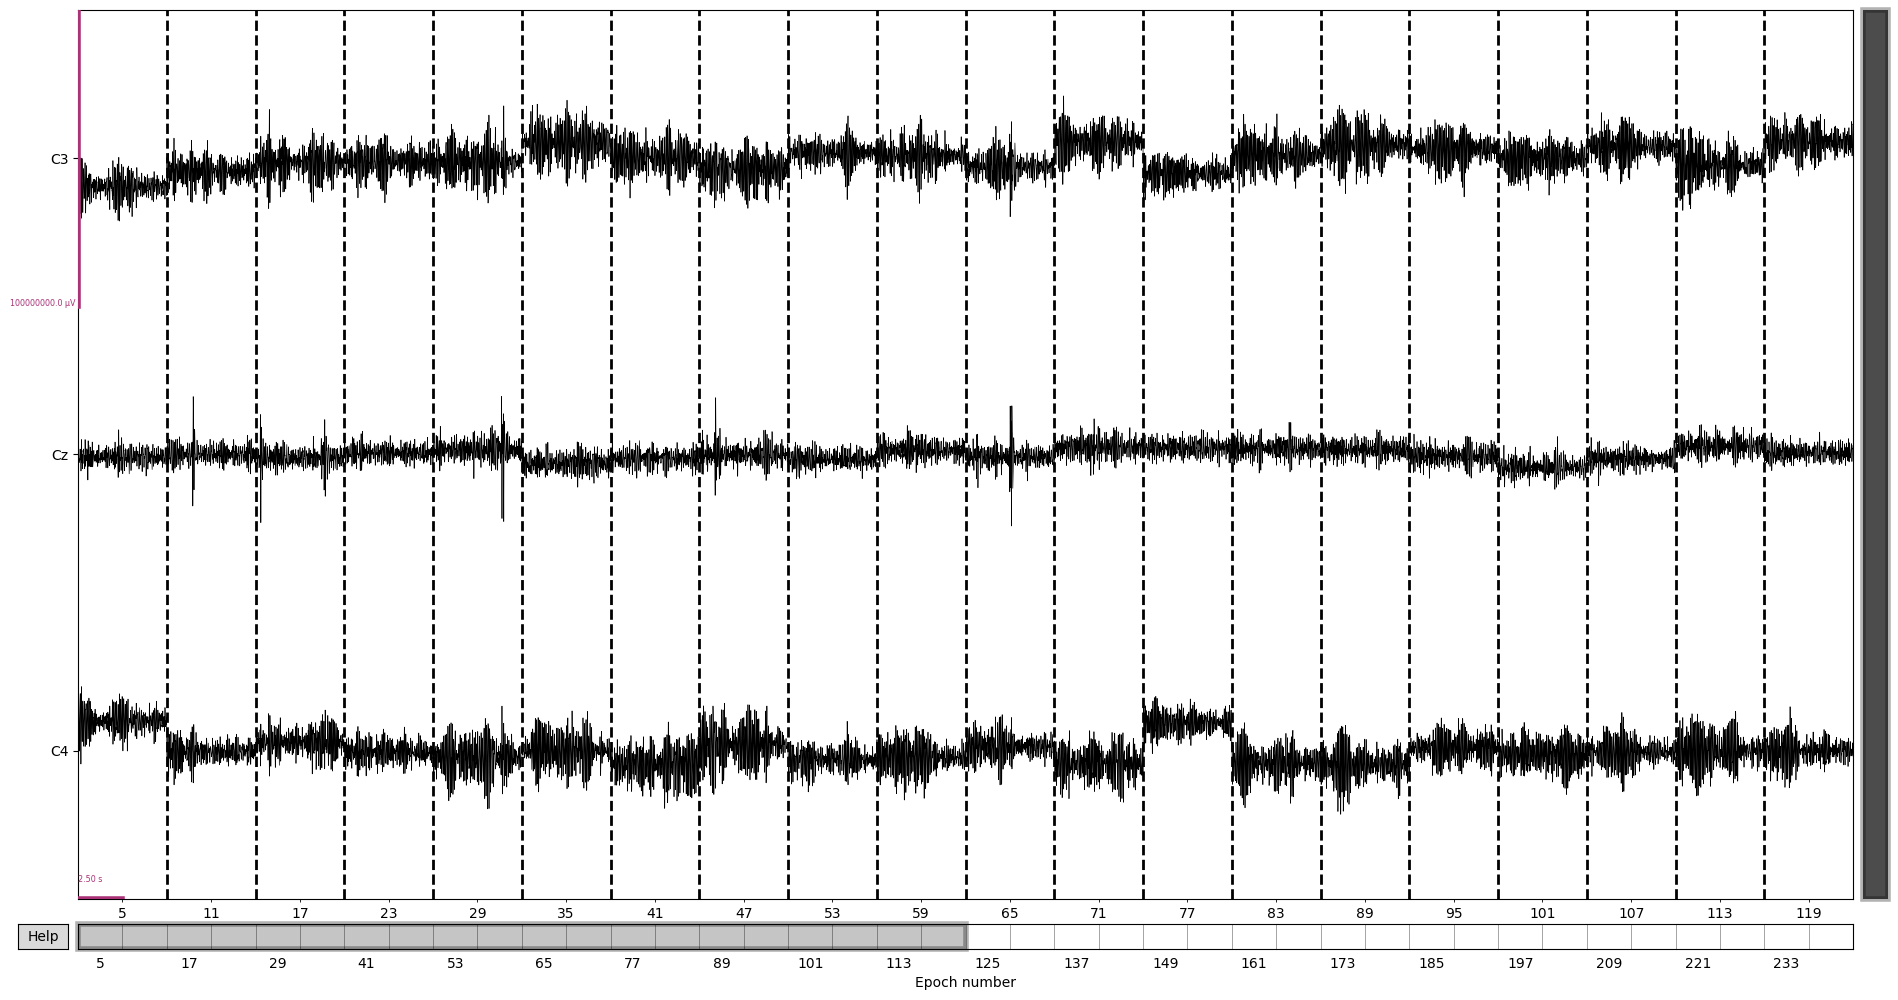

In [26]:
epochs['7'].plot(
    scalings=50, # You may edit scalings value later
    title='Idle',
)

In [11]:
X:np.ndarray = epochs.get_data() * 1e6
F:np.ndarray = epochs.compute_psd(method='welch', fmax=30).get_data()
t:np.ndarray = epochs.times
y:np.ndarray = epochs.events[:, -1]

Effective window size : 5.004 (s)


In [12]:
X.shape, F.shape, t.shape, y.shape

((80, 3, 1251), (80, 3, 151), (1251,), (80,))

Effective window size : 5.004 (s)
Averaging across epochs...


Effective window size : 5.004 (s)
Averaging across epochs...
Effective window size : 5.004 (s)
Averaging across epochs...


C:\Users\hbbeep\AppData\Local\Temp\ipykernel_6004\2505177352.py:7: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  epochs['5'].compute_psd(
C:\Users\hbbeep\AppData\Local\Temp\ipykernel_6004\2505177352.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs['5'].compute_psd(
c:\Users\hbbeep\AppData\Local\Programs\Python\Python38\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\hbbeep\AppData\Local\Temp\ipykernel_6004\2505177352.py:16: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior

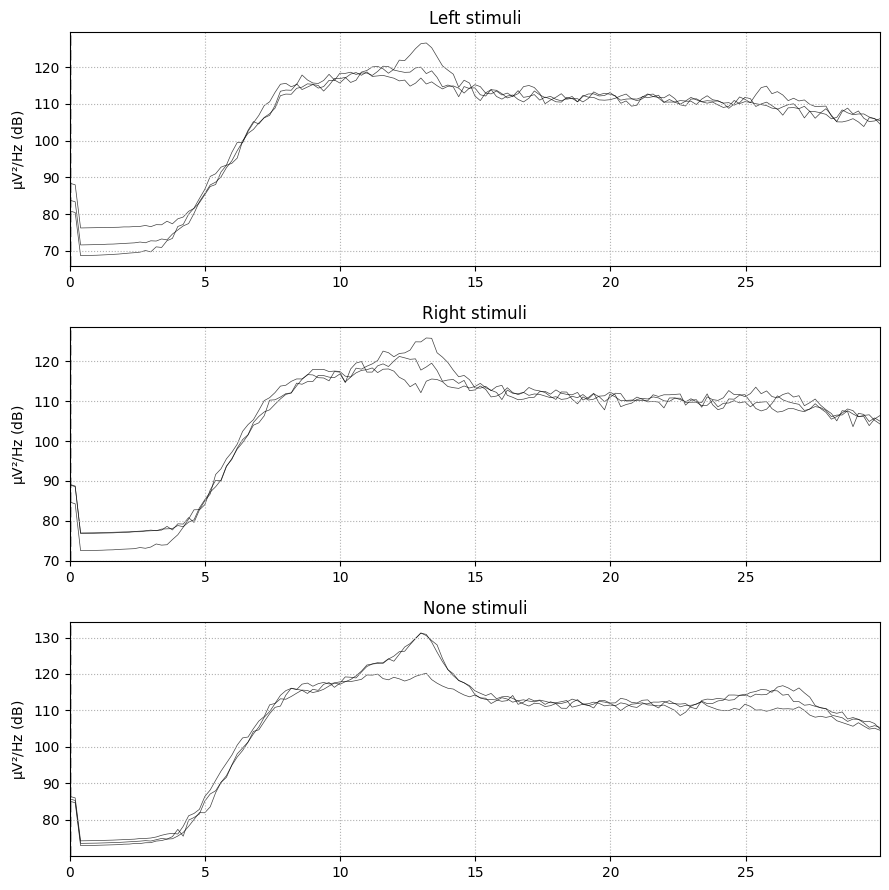

In [27]:
# from utilities import show_epoch
#
# show_epoch(raw)

fig, ax = plt.subplots(3, figsize=(9,9))

epochs['5'].compute_psd(
    method='welch',
    fmax=30,
    ).plot(
        axes=ax[0],
        average=False,
        )
ax[0].set_title('Left stimuli')

epochs['6'].compute_psd(
    method='welch',
    fmax=30,
    ).plot(
        axes=ax[1],
        average=False,
        )
ax[1].set_title('Right stimuli')

epochs['7'].compute_psd(
    method='welch',
    fmax=30,
    ).plot(
        axes=ax[2],
        average=False,
        )
ax[2].set_title('None stimuli')

plt.tight_layout()
plt.show()

In [401]:
np.shape(epochs[0].get_data())

(1, 3, 2501)

In [379]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data to one-hot encoding
y_one_hot = encoder.fit_transform(np.array(y).reshape(-1, 1))

c:\Users\hbbeep\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [380]:
from mne.decoding import Scaler
scaler = Scaler(scalings='mean')
X_norm = scaler.fit_transform(F)
# X_norm = F

In [381]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_one_hot,  test_size=0.2, random_state=6)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train , dtype=torch.float32)
y_test= torch.tensor(y_test , dtype=torch.float32)

# Create TensorDatasets for training and testing
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

BATCH_SIZE = 1
train_loader = DataLoader(train_dataset,  batch_size = BATCH_SIZE, shuffle=False)
test_loader= DataLoader(test_dataset,  batch_size = BATCH_SIZE, shuffle=False)


In [382]:
a = 0
for x,y in train_loader:
    train = np.array(x)
    a += 1
    print(train.shape)

print(a)

(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
(1, 3, 246)
64


In [383]:
train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([1, 3, 246]), torch.Size([1, 3]))

## ChronoNet V0

In [384]:
class Block(nn.Module):
  def __init__(self,inplace):
    super().__init__()
    self.conv1=nn.Conv1d(in_channels=inplace,out_channels=32,kernel_size=2,stride=2,padding=0)
    self.conv2=nn.Conv1d(in_channels=inplace,out_channels=32,kernel_size=4,stride=2,padding=1)
    self.conv3=nn.Conv1d(in_channels=inplace,out_channels=32,kernel_size=8,stride=2,padding=3)
    self.bn1 = nn.BatchNorm1d(32) 
    self.bn2 = nn.BatchNorm1d(32)
    self.bn3 = nn.BatchNorm1d(32)
    self.relu=nn.ReLU()

  def forward(self,x):
    x1=self.relu(self.conv1(x))
    x2=self.relu(self.conv2(x))
    x3=self.relu(self.conv3(x))
    x=torch.cat([x1,x2,x3],dim=1)
    return x

In [388]:
class ChronoNet(nn.Module):
  def __init__(self,channel):
    super().__init__()
    self.block1 = Block(channel)
    self.block2 = Block(96)
    self.block3 = Block(96)
    self.gru1 = nn.GRU(input_size=96, hidden_size=32, batch_first=True, dropout=0.1)  # Dropout added here
    self.gru2 = nn.GRU(input_size=32, hidden_size=32, batch_first=True, dropout=0.1)  # Dropout added here
    self.gru3 = nn.GRU(input_size=64, hidden_size=32, batch_first=True, dropout=0.1)  # Dropout added here
    self.gru4 = nn.GRU(input_size=96, hidden_size=32, batch_first=True, dropout=0.1)  # Dropout added here
    self.gru_linear = nn.Linear(30, 1) # 37 / 312
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(32, 3)
    self.relu = nn.ReLU()
  def forward(self,x):
    x=self.block1(x)
    x=self.block2(x)
    x=self.block3(x)
    x=x.permute(0,2,1)
    gru_out1,_=self.gru1(x)
    gru_out2,_=self.gru2(gru_out1)
    gru_out=torch.cat([gru_out1,gru_out2],dim=2)
    gru_out3,_=self.gru3(gru_out)
    gru_out=torch.cat([gru_out1,gru_out2,gru_out3],dim=2)

    linear_out=self.relu(self.gru_linear(gru_out.permute(0,2,1)))

    gru_out4,_=self.gru4(linear_out.permute(0,2,1))
    x=self.flatten(gru_out4)
    x=self.fc1(x)
    return x

In [389]:
# input=torch.randn(3,3,301)
input=torch.randn(1,3,246) # 
model=ChronoNet(3)
out=model(input)
out.shape

torch.Size([1, 3])

In [390]:
input.shape

torch.Size([1, 3, 246])

In [391]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setuo loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr= 0.003) # 0.05 -> overfit  || 0.001 Good

In [392]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """ Prints difference between start and end time."""
    total_time = end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [393]:
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 300

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    ### Training
    train_loss = 0

    for batch, (X, y) in enumerate(train_loader):
        model.train()
        # 1. Forward pass

        y_pred = model(X)
        # 2. Calculate the loss (per batch)
        # print(y_pred, y)
        loss = loss_fn(y_pred, y)
        train_loss +=  loss 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()


    # Divide total train loss by length of train dataloader
    train_loss /= len(train_loader)

    ### Testing
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.no_grad():
        for X_test, y_test in test_loader:
            test_logits = model(X_test)
            test_pred = torch.softmax(test_logits, dim=1).argmax(dim = 1)
            test_loss += loss_fn(test_logits, y_test).item()
            test_acc += accuracy_fn(y_test.argmax(dim=1), test_pred)
            print(y_test.argmax(dim=1), test_pred)


        test_loss /= len(test_loader)
        test_acc /= len(test_loader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

train_time_end_on_cpu =  timer()
total_train_time_model = print_train_time(start=train_time_start_on_cpu, end= train_time_end_on_cpu, device=str(next(model.parameters()).device))
# Check precision/ recall/ f1-score **

  0%|          | 0/300 [00:00<?, ?it/s]

Epoch: 0
-----
tensor([1]) tensor([0])
tensor([1]) tensor([0])
tensor([1]) tensor([0])
tensor([2]) tensor([0])
tensor([2]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([2]) tensor([0])
tensor([1]) tensor([0])
tensor([1]) tensor([0])
tensor([2]) tensor([0])
tensor([2]) tensor([0])
tensor([2]) tensor([0])
tensor([1]) tensor([0])
tensor([1]) tensor([0])
tensor([2]) tensor([0])

Train loss: 1.0962 | Test loss: 1.1141, Test acc: 12.5000
Epoch: 1
-----
tensor([1]) tensor([2])
tensor([1]) tensor([2])
tensor([1]) tensor([2])
tensor([2]) tensor([2])
tensor([2]) tensor([2])
tensor([0]) tensor([2])
tensor([0]) tensor([2])
tensor([2]) tensor([2])
tensor([1]) tensor([2])
tensor([1]) tensor([2])
tensor([2]) tensor([2])
tensor([2]) tensor([2])
tensor([2]) tensor([2])
tensor([1]) tensor([2])
tensor([1]) tensor([2])
tensor([2]) tensor([2])

Train loss: 1.0785 | Test loss: 1.1057, Test acc: 43.7500
Epoch: 2
-----
tensor([1]) tensor([2])
tensor([1]) tensor([2])
tensor([1]) tensor([2

In [241]:
torch.save(model.state_dict(), 'eeg_classify_model.pth')

In [243]:
model_load = ChronoNet(3)
model_load.load_state_dict(torch.load('eeg_classify_model.pth'))

<All keys matched successfully>

In [244]:
model_load.state_dict()

OrderedDict([('block1.conv1.weight',
              tensor([[[-0.3411, -0.2170],
                       [-0.2964, -0.0301],
                       [-0.0144, -0.3185]],
              
                      [[ 0.2882, -0.3068],
                       [ 0.4018, -0.2668],
                       [-0.0597,  0.0782]],
              
                      [[-0.1825,  0.3793],
                       [-0.2847, -0.0256],
                       [-0.2951,  0.1196]],
              
                      [[ 0.3632,  0.3953],
                       [ 0.0257, -0.1854],
                       [ 0.4487,  0.0596]],
              
                      [[ 0.2790, -0.2082],
                       [-0.1831, -0.3335],
                       [ 0.4047,  0.0885]],
              
                      [[-0.2938,  0.0339],
                       [-0.1752,  0.0199],
                       [ 0.1333, -0.2026]],
              
                      [[ 0.0596, -0.2646],
                       [ 0.0742, -0.3922],
       

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 600

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    ### Training
    train_loss = 0

    for batch, (X, y) in enumerate(train_loader):
        model.train()
        # 1. Forward pass

        y_pred = model(X)
        # 2. Calculate the loss (per batch)
        # print(y_pred, y)
        loss = loss_fn(y_pred, y)
        train_loss +=  loss 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()


    # Divide total train loss by length of train dataloader
    train_loss /= len(train_loader)

    ### Testing
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.no_grad():
        for X_test, y_test in test_loader:
            test_pred = model(X_test)
            test_loss += loss_fn(test_pred, y_test).item()
            test_acc += accuracy_fn(y_test.argmax(dim=1), test_pred.argmax(dim=1))
            # print("-------------------------")
            print(y_test.argmax(dim=1), test_pred.argmax(dim=1))
            # print("-------------------------")
            # print(y_test, test_pred)


        test_loss /= len(test_loader)
        test_acc /= len(test_loader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

train_time_end_on_cpu =  timer()
total_train_time_model = print_train_time(start=train_time_start_on_cpu, end= train_time_end_on_cpu, device=str(next(model.parameters()).device))
# Check precision/ recall/ f1-score **

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 0
-----
tensor([1, 1, 1, 2, 2, 0, 0, 2]) tensor([0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 2, 2, 2, 1, 1, 2]) tensor([0, 0, 0, 0, 0, 0, 0, 0])

Train loss: 1.0770 | Test loss: 1.1303, Test acc: 12.5000
Epoch: 1
-----
tensor([1, 1, 1, 2, 2, 0, 0, 2]) tensor([0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 2, 2, 2, 1, 1, 2]) tensor([0, 0, 0, 0, 0, 0, 0, 0])

Train loss: 1.0766 | Test loss: 1.1302, Test acc: 12.5000
Epoch: 2
-----
tensor([1, 1, 1, 2, 2, 0, 0, 2]) tensor([0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 2, 2, 2, 1, 1, 2]) tensor([0, 0, 0, 0, 0, 0, 0, 0])

Train loss: 1.0762 | Test loss: 1.1300, Test acc: 12.5000
Epoch: 3
-----
tensor([1, 1, 1, 2, 2, 0, 0, 2]) tensor([0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 2, 2, 2, 1, 1, 2]) tensor([0, 0, 0, 0, 0, 0, 0, 0])

Train loss: 1.0759 | Test loss: 1.1298, Test acc: 12.5000
Epoch: 4
-----
tensor([1, 1, 1, 2, 2, 0, 0, 2]) tensor([0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 2, 2, 2, 1, 1, 2]) tensor([0, 0, 0, 0, 0, 0, 0, 0])

Train loss: 1.0755 | Test lo

In [ ]:
y_test

tensor([[0., 0., 1.]])

In [ ]:
y_pred = model(train_features_batch)
print(y_pred)

tensor([[-0.0106,  0.3943,  0.0648],
        [-0.5649, -0.4295,  1.5977],
        [-1.6194, -0.7924,  3.1044]], grad_fn=<AddmmBackward0>)


In [ ]:
torch.argmax(y_pred[2])

tensor(2)

In [ ]:
import torch.nn.functional as F

# Apply softmax using PyTorch
y_pred_softmax = F.softmax(y_pred, dim=1)

print(y_pred_softmax)

tensor([[0.2795, 0.4191, 0.3014],
        [0.0923, 0.1056, 0.8021],
        [0.0086, 0.0197, 0.9716]], grad_fn=<SoftmaxBackward0>)


In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x))  # Subtracting max(x) for numerical stability
    return e_x / e_x.sum(axis=0)

In [ ]:
test = softmax([0.2, 0.4, 0.1])
test

array([0.31987306, 0.39069383, 0.28943311])

In [ ]:
train_labels_batch[0]

tensor([0., 1., 0.])